<a href="https://colab.research.google.com/github/AzlinRusnan/Housing_Price_Analysis/blob/main/Housing_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Description**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [5]:
file_path = '/content/gdrive/MyDrive/Housing.csv'

df = pd.read_csv(file_path)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


##### **Columns Explanation:**

The dataset appears to be about housing properties and includes details such as:

*   **price:** Property price.
*   **area:** The area of the property in square feet.
*   **bedrooms:** Number of bedrooms.
*   **bathrooms:** Number of bathrooms.
*   **stories:** Number of floors.
*   **mainroad:** Whether the property has access to a main road (yes/no).
*   **guestroom:** Availability of a guest room (yes/no).
*   **basement:** Presence of a basement (yes/no).
*   **hotwaterheating:** Availability of hot water heating (yes/no).
*   **airconditioning:** Availability of air conditioning (yes/no).
*   **parking:** Number of parking spaces.
*   **prefarea:** Preferred area status (yes/no). Indicates whether the property is located in a desirable or preferred area, which could mean a high-demand or premium neighborhood.
*   **furnishingstatus:** Furnishing status, which could be "furnished," "semi-furnished," or "unfurnished."














##### **Checking the Total Number of Missing Values**

In [6]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


There is no missing values recorded.

##### **Target Variable**

The target variable (dependent variable) should be continuous, so I chose Price as the target (y).

#### **Data Visualization**

Lets try to understand the data using visualisation.

##### **Converting Rupee to MYR**

It is always fascinating to convert foreign currency to MYR, as it gives us a clearer picture of the housing situation in other countries! 😉

In [17]:
# Import necessary libraries
import pandas as pd

# Conversion rate from INR to MYR
conversion_rate = 0.05225

# Convert prices from INR to MYR
df['price_myr'] = df['price'] * conversion_rate

# Select relevant columns for the table
comparison_table = df[['price', 'price_myr']]

# Rename columns for clarity
comparison_table = comparison_table.rename(columns={'price': 'price_inr', 'price_myr': 'price_myr'})

# Display the table for the user
print(comparison_table)


     price_inr    price_myr
0     13300000  694925.0000
1     12250000  640062.5000
2     12250000  640062.5000
3     12215000  638233.7500
4     11410000  596172.5000
..         ...          ...
540    1820000   95095.0000
541    1767150   92333.5875
542    1750000   91437.5000
543    1750000   91437.5000
544    1750000   91437.5000

[545 rows x 2 columns]


##### **Visualising Numeric Variables**

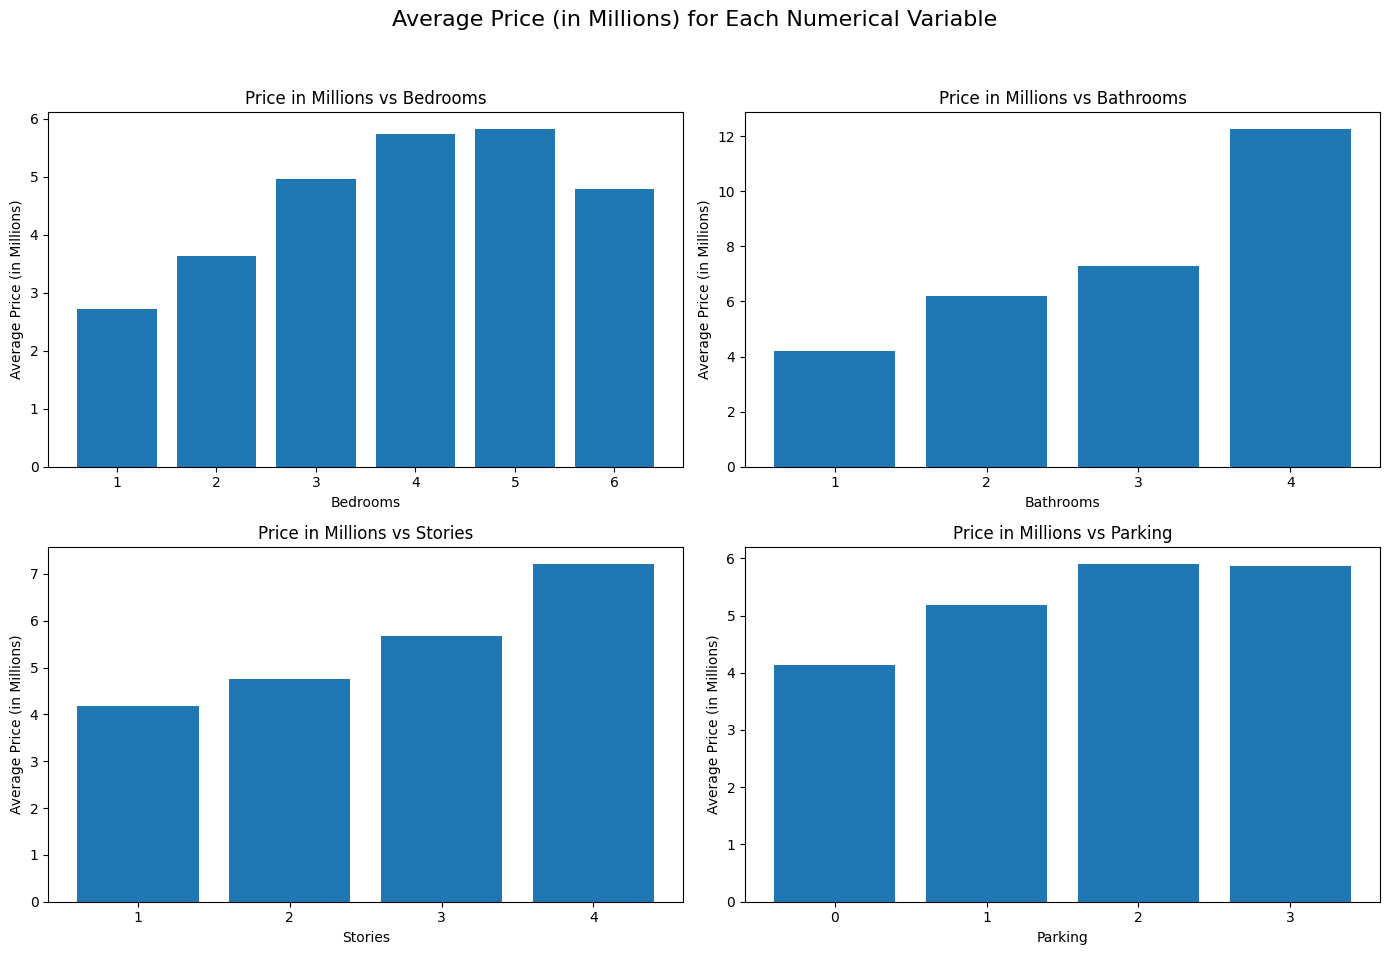

In [20]:
df['price_million'] = df['price'] / 1e6

# Define numerical columns to plot against price
numerical_columns = ['bedrooms', 'bathrooms', 'stories', 'parking']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Average Price (in Millions) for Each Numerical Variable', fontsize=16)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Generate each bar plot on the respective subplot
for i, column in enumerate(numerical_columns):
    avg_price = df.groupby(column)['price_million'].mean()

    # Plotting on respective subplot
    axes[i].bar(avg_price.index, avg_price.values)
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Average Price (in Millions)')
    axes[i].set_title(f'Price in Millions vs {column.capitalize()}')
    axes[i].set_xticks(np.arange(min(df[column]), max(df[column]) + 1, 1))

# Adjust layout for better readability
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


###### **Insights:**

We can see that a greater number of bedrooms, bathrooms, stories, and parking spaces contribute to higher housing prices.

##### **Visualising Categorical Variables**

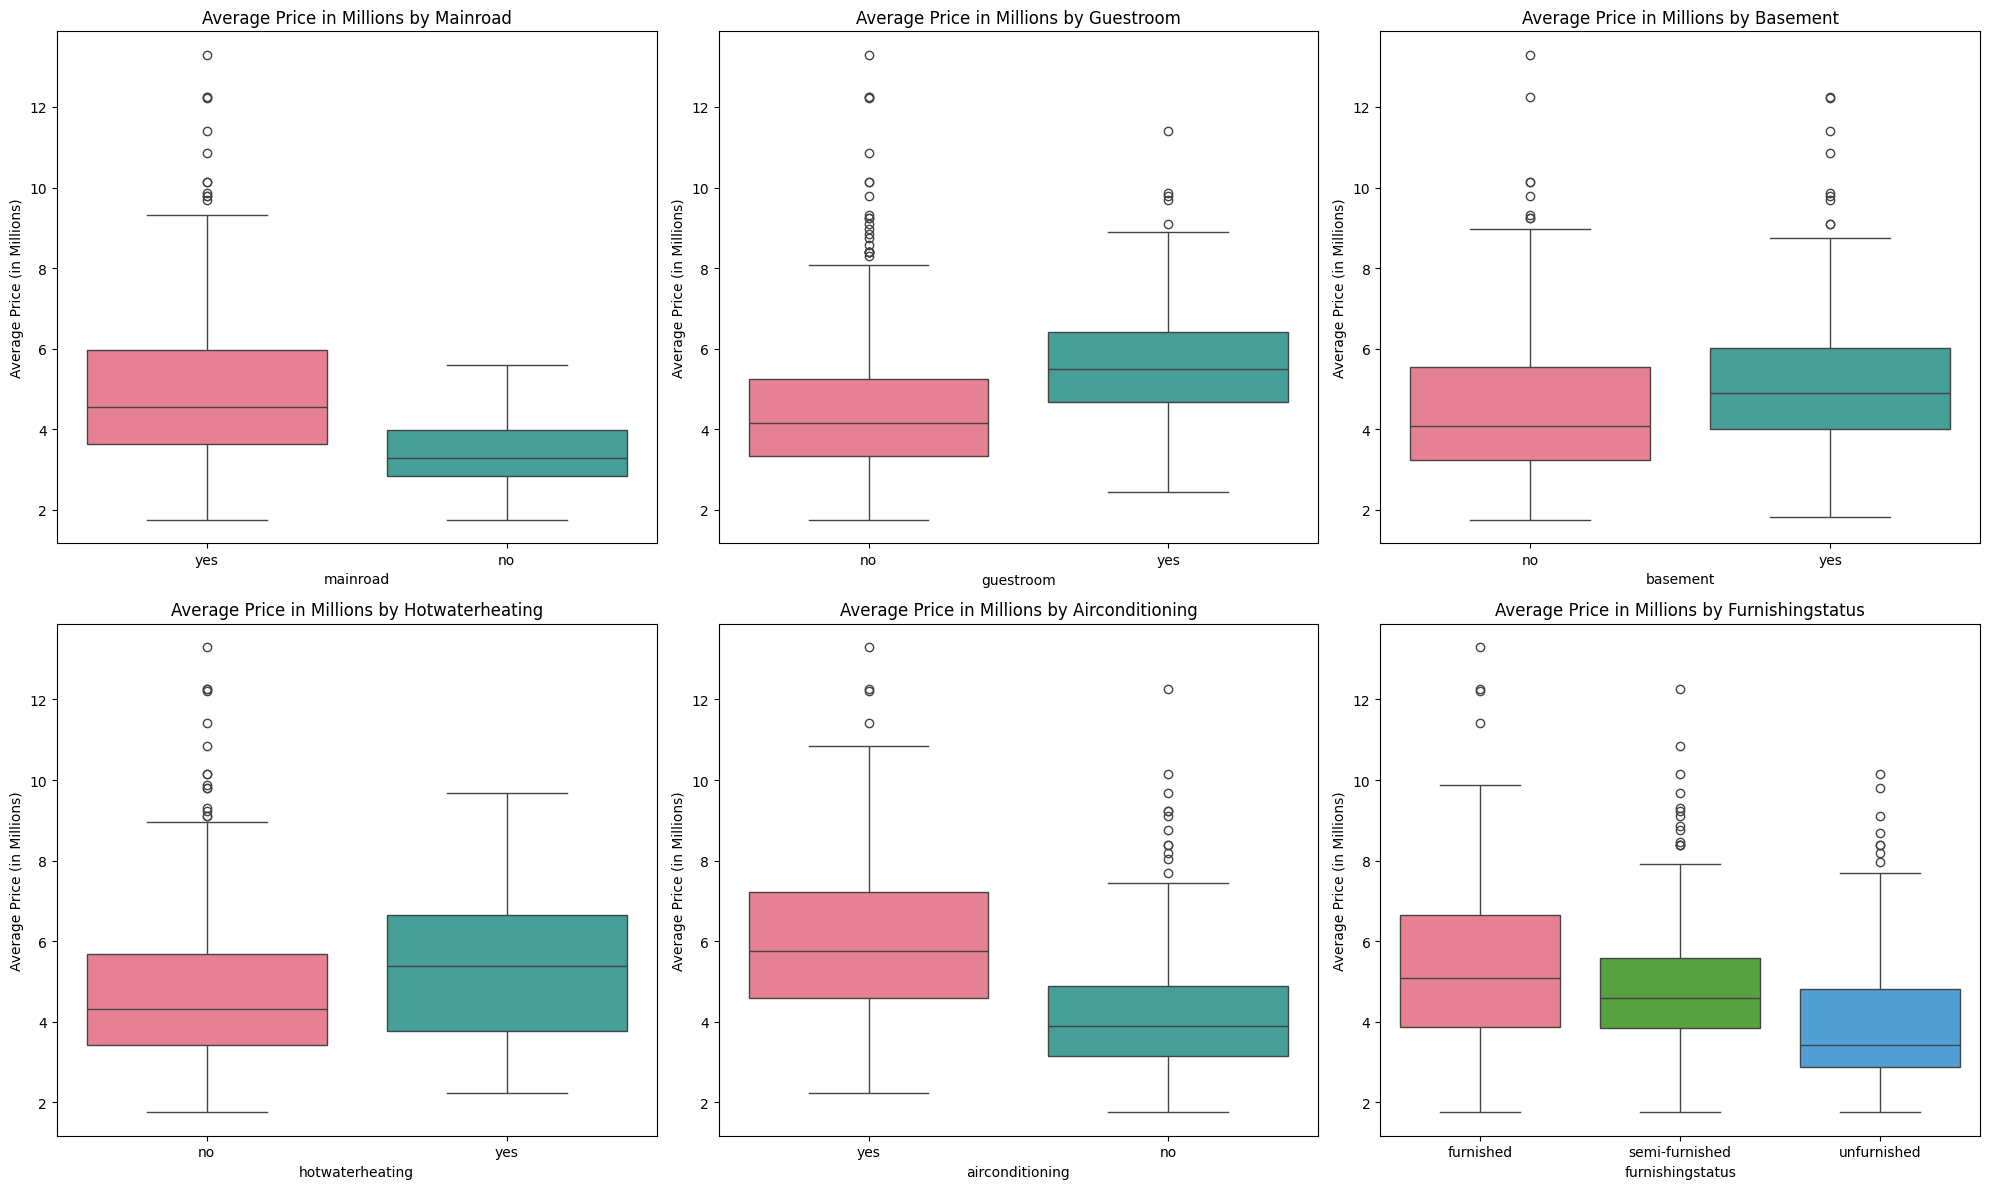

In [25]:
# Convert the price to millions for readability
df['price_million'] = df['price'] / 1e6

# Plot each boxplot in a 2x3 grid layout with average price in millions
plt.figure(figsize=(20, 12))

for i, category in enumerate(categories, start=1):
    plt.subplot(2, 3, i)

    # Calculate average price for each category and plot as boxplot
    avg_price = df.groupby(category)['price_million'].mean()
    sns.boxplot(x=category, y='price_million', data=df, palette=sns.color_palette("husl", len(df[category].unique())))

    plt.title(f'Average Price in Millions by {category.capitalize()}')
    plt.ylabel('Average Price (in Millions)')

# Display the plots with a tight layout
plt.tight_layout()
plt.show()

###### **Insights:**

We can see that a 'yes' contributing to higher housing price.